# ROSETTA-Ice Airborne Gravity Data
**Description:**  Gravity data over the Ross Ice Shelf, as well as inverted crustal density values.

**Dataset:** 

N.A.

**Associated paper:** 

Tinto, K. J., L. Padman, Christine S. Siddoway, S. R. Springer, H. A. Fricker, I. Das, Fabio Caratori-Tontini, et al. “Ross Ice Shelf Response to Climate Driven by the Tectonic Imprint on Seafloor Bathymetry.” Nature Geoscience 12, no. 6 (2019): 441–49. https://doi.org/10.1038/s41561-019-0370-2.


In [1]:
%%capture
%load_ext autoreload
%autoreload 2

import pygmt

from polartoolkit import fetch, maps, regions, utils

In [3]:
version_names = [
    "shapefile",
    "gravity",
    "density",
]

dfs = []
for name in version_names:
    df = fetch.rosetta_gravity(
        version=name,
    )
    print(f"{name}:{df.head()}")
    dfs.append(df)

100%|█████████████████████████████████████| 9.04M/9.04M [00:00<00:00, 4.72GB/s]


shapefile:   Id LineNum                                           geometry
0   0    L100  LINESTRING (-252058.397 -540632.028, -251958.2...
1   0    L110  LINESTRING (-249634.614 -550442.633, -249527.0...
2   0    L130  LINESTRING (-124288.506 -570552.664, -124373.4...
3   0    L140  LINESTRING (-91644.249 -580308.545, -91729.597...
4   0    L160  LINESTRING (-248607.209 -600830.619, -248524.6...
gravity:   Line   LATITUDE   LONGITUDE      unixtime   Height              x  \
0  20.0 -85.389220 -156.700683  1.480723e+09  880.889 -198301.708804   
1  20.0 -85.388896 -156.691339  1.480723e+09  880.971 -198390.750930   
2  20.0 -85.388572 -156.682000  1.480723e+09  881.216 -198479.758476   
3  20.0 -85.388248 -156.672664  1.480723e+09  881.580 -198568.724586   
4  20.0 -85.387925 -156.663334  1.480723e+09  882.032 -198657.644906   

               y  FAG_levelled  
0 -460466.526729    -63.140519  
1 -460466.568482    -63.149290  
2 -460466.588212    -63.159926  
3 -460466.569953    -63.172

100%|█████████████████████████████████████| 44.6M/44.6M [00:00<00:00, 20.1GB/s]


density:   Line   LATITUDE   LONGITUDE      unixtime   Height              x  \
0  50.0 -85.227142 -160.875625  1.480722e+09  876.333 -170032.701709   
1  50.0 -85.227420 -160.885300  1.480722e+09  876.729 -169939.994232   
2  50.0 -85.227698 -160.894974  1.480722e+09  876.878 -169847.303782   
3  50.0 -85.227976 -160.904642  1.480722e+09  877.043 -169754.652467   
4  50.0 -85.228254 -160.914305  1.480722e+09  877.280 -169662.038400   

               y  density_model  
0 -490350.379092       2.657957  
1 -490350.509326       2.657630  
2 -490350.628305       2.657304  
3 -490350.677517       2.656978  
4 -490350.636555       2.656652  


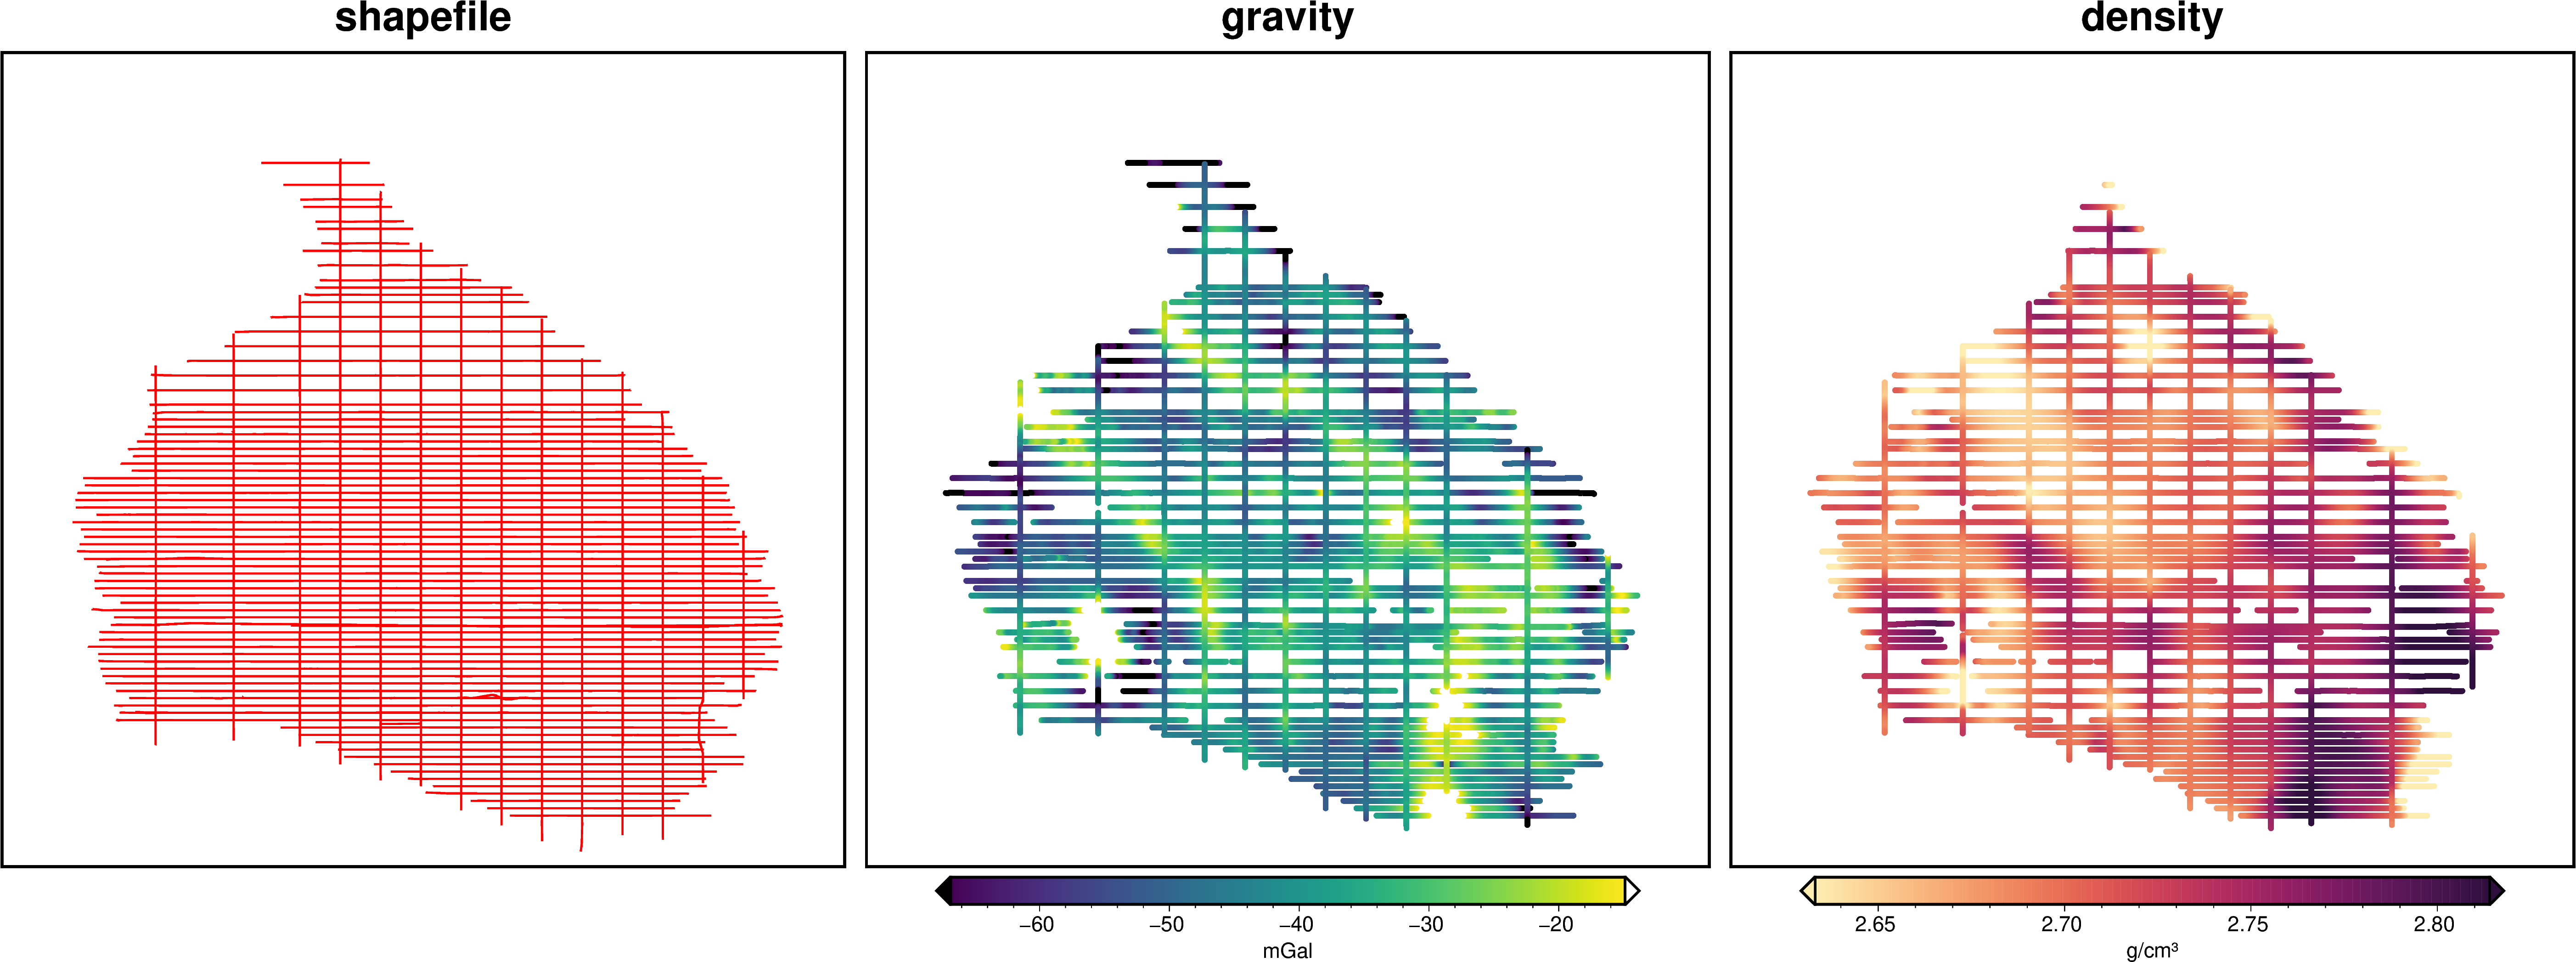

In [6]:
region = regions.ross_ice_shelf

for i, v in enumerate(version_names):
    # determine subplot shifts
    if i == 0:
        fig = maps.basemap(
            region=region,
            hemisphere="south",
            title=v,
        )
        fig.plot(
            dfs[i],
            pen="1p,red",
        )
    elif i == 1:
        fig = maps.basemap(
            region=region,
            hemisphere="south",
            fig=fig,
            origin_shift="xshift",
            title=v,
        )
        # make a colorscale
        zmin, zmax = utils.get_min_max(dfs[i].FAG_levelled, robust=True)
        pygmt.makecpt(cmap="viridis", series=[zmin, zmax])
        # plot the points
        fig.plot(
            x=dfs[i]["x"],
            y=dfs[i]["y"],
            fill=dfs[i].FAG_levelled,
            cmap=True,
            style="c.1c",
        )
        # add a colorbar
        maps.add_colorbar(fig=fig, cbar_label="mGal")

    elif i == 2:
        fig = maps.basemap(
            region=region,
            hemisphere="south",
            fig=fig,
            origin_shift="xshift",
            title=v,
        )
        # make a colorscale
        zmin, zmax = utils.get_min_max(dfs[i].density_model, robust=True)
        pygmt.makecpt(cmap="matter", series=[zmin, zmax], background=True)
        # plot the points
        fig.plot(
            x=dfs[i]["x"],
            y=dfs[i]["y"],
            fill=dfs[i].density_model,
            cmap=True,
            style="c.1c",
        )
        # add a colorbar
        maps.add_colorbar(fig=fig, cbar_label="g/cm³")

fig.show()